<a href="https://colab.research.google.com/github/RyuMyunggi/data-structure/blob/main/hash_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Hasgh Table: 해시테이블
* key, value로 데이터를 저장하는 자료구조
* 빠르게 데이터를 검색할 수 있는 것이 특징
* 내부적으로 배열(버킷)을 사용하여 데이터를 저장하고, 해시테이블은 각각 key값에 대한 해시 함수를 적용해 배열의 고유한 index를 생성하고, 이 index를 활용해 저장하거나 검색. 여기서 값이 저장되는 장소를 버킷/슬롯 이라고 함
* 각 키는 해시 함수를 계산할 수 있어야함
* 두 개의 키가 동일한 버킷에 해시될 때, 문제가 발생. 이를 해시 충돌이라고 함
* 해시 테이블의 조회, 삽입, 삭제의 시간 복잡도는 O(1)
* 최악의 경우 각 키가 동일한 버킷으로 해시 된다면 각 작업의 시간 복잡도는 O(n)

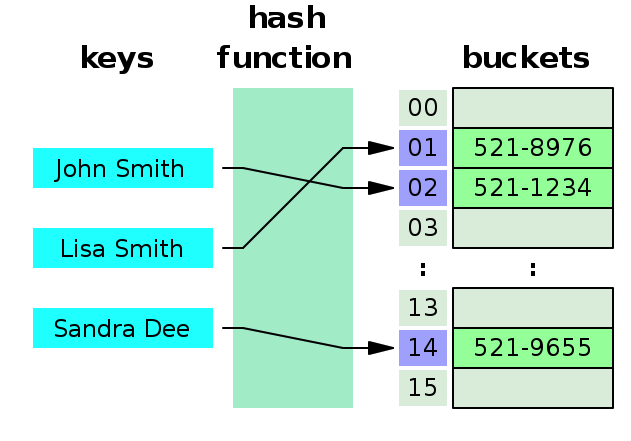

### 해싱
* 임의의 길이의 값을 해시함수를 사용하여 고정된 크기의 값으로 변환하는 작업
* key -> hash -> value

### 해시 테이블
* 해시 함수를 사용하여 변환한 값을 색인(index)으로 삼아 key와 value를 저장하는 자료구조
* 이진탐색트리나 배열에 비해서 굉장히 빠른 속도로 탐색, 삽입, 삭제를 할 수 있음

## 해시 함수
* key를 hash로 바꿔주는 역할. 다양한 길이를 가지고 있는 key를 일정한 길이를 가지는 hash로 변경하여 저장소를 효율적으로 운영할 수 있게 도와줌
* 해시 함수에서 중요한 것은 고유한 인덱스 값을 설정하는 것과 해시 충돌을 일으키는 확률을 줄이는 함수를 만드는 것
* 해시 함수의 대표적 3가지
  * division method(나눗셈 법)
    * 나눗셈을 이용하는 방식. 입력 값을 테이블의 크기로 나누어 계산(주소 = 입력 값 % 테이블의 크기).
    * 테이블 크기를 절대 넘지 않음
    * 테이블의 크기를 소수로 정하고 2의 제곱수와 먼 값을 사용해야 효과가 좋다고 알려짐
  * digit folding(자리수 접기)
    * 각 키의 문자열을 아스키코드로 바꾸고 값을 합한 데이터를 테이블 내의 주소로 사용하는 방법
  * multiplicaion method: 숫자로 된 key값 0과 1 사이의 실수 A, 보통 2의 제곱수인 m을 사용하여 계산을 함

### 장점
* 적은 리소스로 많은 데이터를 효율적으로 관리할 수 있음
* 배열의 인덱스를 사용하여 검색, 삽입, 삭제가 빠름. 평균 시간 복잡도 O(1)
  * 인덱스는 데이터만의 고유한 위치. 따라서 만약 삽입이나 삭제를 한다고해도 다른 데이터로 채울 필요가 없음. 즉 삽입이나 삭제할 때 데이터를 이동 시킬 필요가 없음
* 키와 해시 값이 연관성이 없어 보안에도 많이 사용
* 데이터 캐싱에 많이 사용됨
  * get, put 에 캐시로직을 추가하면 자주 사용하는 데이터를 바로 찾을 수 있음
* 중복을 제거하는데 유용

### 단점
* 해시 충돌이 발생할 수 있음
* 오버 플로우
  * 해시 충돌이 버킷에 할당된 슬롯 수보다 많이 발생하면 더 이상 버킷에 값을 넣을 수 없음
* 공간 복잡도가 커짐
* 순서가 있는 배열에는 어울리지 않음
* 해시 함수의 의존도가 높아짐

### 해시 테이블
* 병렬 처리를 할 떄 (동기화를 고려해야할 떄)
* None 값을 허용하지 않음

### 해시 맵
* 병렬 처리를 하지 않을 떄(동기화를 고려하지 않아도 될 때)
* None값을 허용함

In [ ]:
## linked-list
class Node(object):
  def __init__(self, value=None, pointer=None):
    self.value = value
    self.pointer = pointer

  def getData(self):
    return self.value

  def getNext(self):
    return self.pointer

  def setData(self, new_data):
    self.value = new_data
  
  def setNext(self, new_pointer):
    self.pointer = new_pointer

class LinkedListFIFO(object):
  def __init__(self):
    self.head = None
    self.length = 0
    self.tail = None

  def _printList(self):
    node = self.head
    while node:
      print(node.value, end=' ')
      node = node.pointer
    print()

  def _addFirst(self, value):
    self.length = 1
    node = Node(value)
    self.head = node
    self.tail = node

  def _deleteFirst(self):
    self.length = 0
    self.head = None
    self.tail = None
    print('연결 리스트가 비었습니다')

  def _add(self, value):
    self.length += 1
    node = Node(value)
    if self.tail:
      self.tail.pointer = node
    self.tail = node

  def addNode(self, value):
    if not self.head:
      self._addFirst(value)
    else:
      self._add(value)

  def _find(self, index):
    prev = None
    node = self.head
    i = 0
    while node and i < index:
      prev = node
      node = node.pointer
      i += 1

    return node, prev, i

  def _find_by_value(self, value):
    prev = None
    node = self.head
    found = False
    while node and not found:
      if node.value == value:
        found = True
      else:
        prev = node
        node = node.pointer
      
    return node, prev, found

  def deleteNode(self, index):
    if not self.head or not self.head.pointer:
      self._deleteFirst()
    else:
      node, prev, i = self._find(index)
      if i == index and node:
        self.length -= 1
        if i == 0 or not prev:
          self.head = node.pointer
          self.tail = node.pointer
        else:
          prev.pointer = node.pointer
      else:
        print(f'인덱스 {index}에 해당하는 노드가 없습니다')
  
  def deleteNodeByValue(self, value):
    if not self.head or not self.head.pointer:
      self._deleteFirst()
    else:
      node, prev, i = self._find_by_value(value)
      if node and node.value == value:
        self.length -= 1
        if i ==0 or not prev:
          self.head = node.pointer
          self.tail = node.pointer
        else:
          prev.pointer = node.pointer
      else:
        print(f'값 {value}에 해당하는 노드가 없습니다')


ll = LinkedListFIFO()
for i in range(1, 5):
  ll.addNode(i)
print('연결 리스트 출력')
ll._printList()
print('인덱스가 2인 노드 삭제 후, 연결 리스트 출력: ')
ll.deleteNode(2)
ll._printList()

print('값이 15인 노드 추가 후, 연결 리스트 출력')
ll.addNode(15)
ll._printList()
print('모든 노드 삭제 후, 연결 리스트 출력')
for i in range(ll.length-1, -1, -1):
  ll.deleteNode(i)
ll._printList()


연결 리스트 출력
1 2 3 4 
인덱스가 2인 노드 삭제 후, 연결 리스트 출력: 
1 2 4 
값이 15인 노드 추가 후, 연결 리스트 출력
1 2 4 15 
모든 노드 삭제 후, 연결 리스트 출력
연결 리스트가 비었습니다



In [ ]:
class HashTableLL(object):
  def __init__(self, size):
    self.size = size
    self.slots = []
    self._createHashTable()

  def _createHashTable(self):
    for i in range(self.size):
      self.slots.append(LinkedListFIFO())

  def _find(self, item):
    return item % self.size
  
  def _add(self, item):
    index = self._find(item)
    self.slots[index].addNode(item)

  def _delete(self, item):
    index = self._find(item)
    self.slots[index].deleteNodeByValue(item)

  def _print(self):
    for i in range(self.size):
      print(f'슬롯 {i}')
      self.slots[i]._printList()

def test_hash_tables():
  H1 = HashTableLL(3)
  for i in range(0, 20):
    H1._add(i)
  H1._print()
  print('\n항목 0,1,2를 삭제합니다')
  H1._delete(0)
  H1._delete(1)
  H1._delete(2)
  H1._print()

test_hash_tables()

슬롯 0
0 3 6 9 12 15 18 
슬롯 1
1 4 7 10 13 16 19 
슬롯 2
2 5 8 11 14 17 

항목 0,1,2를 삭제합니다
슬롯 0
3 6 9 12 15 18 
슬롯 1
4 7 10 13 16 19 
슬롯 2
5 8 11 14 17 


## 자료 참조
* https://hee96-story.tistory.com/48
* https://bb-dochi.tistory.com/10
* https://dev-kani.tistory.com/1